<a href="https://colab.research.google.com/github/jcarvaj18643/universidad-Taller2-RedesNeuronales/blob/jaime/Gu%C3%ADa_II_Machine_learning_II_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcoteran/deeplearning/blob/master/notebooks/3.2_deepleaningintroduction_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" title="Abrir y ejecutar en Google Colaboratory"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marcoteran/deeplearning/blob/master/notebooks/3.2_deepleaningintroduction_dnn.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Abrir en Kaggle" title="Abrir y ejecutar en Kaggle"/></a>
  </td>
</table>

# Ejemplo de código
# Guía 2: Proyecto Precio de vehículos usados
## Machine Learning II

Sergio David Díaz Veru
___

<h1 id="problema">Contexto analítico y exploración de datos</h1>

El mercado de autos usados es reconocido por ser un sector economico muy competido con un centenar de compañias que luchan por hacerse con una porción de la torta. El precio de los autos se devalua año año debido a multiples factores y determinar el precio correcto es clave para las compañias para lograr competir en el mercado. En este caso se requiere implementar una red neural que permita determinar el valor más justo para los vehiculos dependiento de sus atributos.

Se cuenta con un dataset used-car-price-prediction-dataset cargado directamente desde kaggle


In [241]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import io
import os
import warnings
warnings.filterwarnings('ignore')
#from google.colab import files #Librería necesaria para interactuar con archivos en Colab

In [242]:
pip install kagglehub

In [243]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taeefnajib/used-car-price-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/taeefnajib/used-car-price-prediction-dataset/versions/1


In [244]:
os.listdir(path)

['used_cars.csv']

In [245]:
#uploaded = files.upload()
#cars = pd.read_csv(io.StringIO(uploaded['Craiglist_Cars.csv'].decode('utf-8')), sep = ',' )
cars = pd.read_csv(path+'/used_cars.csv', sep = ',' )

In [246]:
cars.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"


In [247]:
# prompt: convertir price de un valor $10,300 a un valor decimal que represente el precio

def convert_price_to_decimal(price_str):
  """Converts a price string like '$10,300' to a decimal representation.

  Args:
    price_str: The price string to convert.

  Returns:
    The decimal representation of the price, or None if the string is not a valid price.
  """
  try:
    price_str = price_str.replace('$', '').replace(',', '')
    return float(price_str)
  except ValueError:
    return None

# Example usage:
price_str = '$10,300'
decimal_price = convert_price_to_decimal(price_str)
print(f"The decimal representation of {price_str} is: {decimal_price}")

The decimal representation of $10,300 is: 10300.0


In [248]:

cars['price'] = cars['price'].apply(convert_price_to_decimal)

print(cars.head())

      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic        

# 1. Evalua la cantidad, tipo y completitud de las variables disponibles

En esta sección, se realiza una exploración básica del conjunto de datos "cars" utilizando algunas funciones de pandas.

Primero, se utiliza la función shape de pandas para imprimir la cantidad de filas y columnas en "cars". Esto proporciona una idea inicial de la magnitud del conjunto de datos.

Luego, se utiliza la función isnull para detectar la cantidad de valores nulos en cada columna de "cars". Se calcula el porcentaje de valores nulos para cada columna y se imprime en pantalla.

In [249]:
print(cars.shape)
100*cars.isnull().sum()/cars.shape[0]

(4009, 12)


,0
brand,0.000000
model,0.000000
model_year,0.000000
milage,0.000000
fuel_type,4.240459
engine,0.000000
transmission,0.000000
ext_col,0.000000
int_col,0.000000
accident,2.818658


A continuación, se utiliza la función DataFrame de pandas para crear un nuevo dataframe llamado "types", que almacena los tipos de datos de cada columna en "cars". Esto ayuda a comprender mejor la estructura de los datos y cómo se deben manejar

In [250]:
types = pd.DataFrame(cars.dtypes)
print(types.groupby(0).size())

0
int64       1
float64     1
object     10
dtype: int64


Finalmente, se crea una lista llamada "categoricas" que almacena los nombres de las columnas que contienen datos categóricos (es decir, no numéricos). Se utiliza un bucle para recorrer cada columna categórica y se imprime en pantalla la cantidad de valores únicos en esa columna. Esto proporciona información adicional sobre la naturaleza de los datos y cómo se deben procesar para el análisis posterior.

In [251]:
categoricas = types.index[types[0] == 'O'].values
for line in categoricas:
 print("La variable "+ line +" contiene:",str(len(cars[line].unique()))+" distinct values")

La variable brand contiene: 57 distinct values
La variable model contiene: 1898 distinct values
La variable milage contiene: 2818 distinct values
La variable fuel_type contiene: 8 distinct values
La variable engine contiene: 1146 distinct values
La variable transmission contiene: 62 distinct values
La variable ext_col contiene: 319 distinct values
La variable int_col contiene: 156 distinct values
La variable accident contiene: 3 distinct values
La variable clean_title contiene: 2 distinct values


# Ingeniería de datos

Ahora se debe preparar la información para poder alimentar la red neuronal.

# 2. Implementa estrategías para tratar la información nula en las variables cuya tasa de nulos sea máximo el 10%

En esta sección, se realizan algunas tareas de limpieza y preparación de datos para el conjunto de datos "cars".

1. En primer lugar, se rellenan los valores faltantes en la columna "fuel" con el valor más común utilizando la función fillna de pandas. Este es un ejemplo de cómo manejar valores nulos o faltantes en el conjunto de datos.
2. Luego, se vuelven a imprimir las dimensiones de "cars" y se verifica si hay valores nulos en otras columnas.
3. Después, se rellenan los valores faltantes en las columnas "title_status", "transmission" y "manufacturer" con el valor más común utilizando la función fillna de pandas.

In [252]:
# prompt: En primer lugar, se rellenan los valores faltantes en la columna "fuel" con el valor más común utilizando la función fillna de pandas. Este es un ejemplo de cómo manejar valores nulos o faltantes en el conjunto de datos

# Assuming you have a DataFrame named 'cars' and want to fill missing values in 'fuel'
cars['fuel_type'].fillna(cars['fuel_type'].mode()[0], inplace=True)

# Print the shape of the DataFrame to verify
print(cars.shape)
print(100*cars.isnull().sum()/cars.shape[0])

(4009, 12)
brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        0.000000
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         2.818658
clean_title     14.866550
price            0.000000
dtype: float64


In [253]:

cars['accident'].fillna(cars['accident'].mode()[0], inplace=True)
cars['clean_title'].fillna(cars['clean_title'].mode()[0], inplace=True)

# Print the shape of the DataFrame to verify
print(cars.shape)


(4009, 12)


In [254]:
100*cars.isnull().sum()/cars.shape[0]

,0
brand,0.0
model,0.0
model_year,0.0
milage,0.0
fuel_type,0.0
engine,0.0
transmission,0.0
ext_col,0.0
int_col,0.0
accident,0.0


In [255]:
import tensorflow as tf
!nvidia-smi
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Wed Oct 23 21:58:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0              30W /  70W |   2219MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Luego del procedimiento anterior se debe proceder a convertir las variables categoricas en variables numericas. Durante el curso implementamos un método de One Hot Encoding disponible en Scikit Learn. En este caso utilizaremos una funcionalidad embedida en Pandas denominada ["get_dummies"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html):

* A continuación, se crea una copia del dataframe llamado "df" y se aplican técnicas de codificación de variables categóricas. Se crea una nueva columna para cada valor posible en cada variable categórica y se codifica como 1 si la observación tiene ese valor y 0 si no lo tiene. Esto se realiza utilizando la función get_dummies de pandas.
* Además, se eliminan las columnas que contienen la categoría "other" ya que no aportan ningún valor al conjunto de datos.
* Luego, se vuelven a imprimir las dimensiones de "df" y se imprime una vista previa del conjunto de datos.

In [256]:
df= cars.copy()
for col in categoricas:
    df = pd.concat([df, (pd.get_dummies(df[col])).astype(int)], axis=1)
    df.drop(columns=[col],inplace=True)
    print(col)

print(df.shape)

df.head(3)

brand
model
milage
fuel_type
engine
transmission
ext_col
int_col
accident
clean_title
(4009, 6468)


,model_year,price,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,...,WHITE,Walnut,Whisper Beige,White,White / Brown,Yellow,–,At least 1 accident or damage reported,None reported,Yes
0,2013,10300.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2021,38005.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2022,54598.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


A continuación, se utiliza la función DataFrame de pandas para crear un nuevo dataframe llamado "types", que almacena los tipos de datos de cada columna en "df".

In [257]:
types = pd.DataFrame(df.dtypes)
print("Tipos de variables",types.groupby(0).size())

Tipos de variables 0
int64      6467
float64       1
dtype: int64


Después, se seleccionan las columnas numéricas del conjunto de datos y se eliminan las que corresponden a la variable objetivo ("price"). Esto se realiza utilizando la función set de Python para encontrar las columnas numéricas y luego la función list para convertir el resultado en una lista.

Por último, se crea un nuevo dataframe llamado "variables_consolidadas" que contiene solo las variables numéricas y se crea un nuevo dataframe llamado "objetivo" que contiene solo la variable objetivo ("price").

In [258]:
variables_consolidadas = df.drop(columns=['price'])
objetivo = df[['price']]

print(variables_consolidadas.shape)
print(objetivo.shape)

(4009, 6467)
(4009, 1)


# 3. Separa el set de datos consolidados en 3 sets (entrenamiento, prueba y validación) de acuerdo con las recomendaciones vistas en el curso.


En estas líneas de código se utiliza la librería Scikit-learn para dividir los datos en conjuntos de entrenamiento, validación y prueba. Se utiliza la función "train_test_split" para crear los tres conjuntos a partir de las variables consolidadas (x) y la variable objetivo (y).
* Primero, se divide en 80% de entrenamiento y 20% de prueba.
* Luego, se divide el conjunto de entrenamiento en 90% para entrenamiento y 10% para validación.

In [259]:
# Coloca tu código aquí
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(variables_consolidadas, objetivo, test_size=0.1, random_state=42)

In [260]:
#80% train 20% test
print(x_train_full.shape)
print(x_test.shape)
print(y_train_full.shape)
print(y_test.shape)

(3608, 6467)
(401, 6467)
(3608, 1)
(401, 1)


In [261]:
#80% train 20% val
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.111, random_state=42)

Posteriormente, se utiliza la función "reshape" para cambiar la forma de las variables objetivo y poder utilizarlas en modelos de aprendizaje automático.

In [262]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
y_val=y_val.values.reshape(-1,1)

Finalmente, se imprimen las formas (shapes) de los conjuntos de entrenamiento, validación y prueba para verificar que se hayan creado correctamente.

In [263]:
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_train: (3207, 6467)
Shape of x_test: (401, 6467)
Shape of x_val: (401, 6467)
Shape of y_train: (3207, 1)
Shape of y_test: (401, 1)
Shape of y_val: (401, 1)


<h1 id="arquitectura">Diseño, Entrenamiento y Evaluación de la RN</h1>

Una vez consolidado los sets de información de entrenamiento, validacion y pruebas ya podemos iniciar a modelar nuestra red neuronal con las siguientes consideraciones:
* Realiza la prueba con un par de arquitecturas iniciales.
* Evalua el desempeño de la red.
* Si el desempeño es bajo vuelve a la información y prueba estrategias de estandarización de la información.

# 4. Implementa una red neuronal cuyas pérdidas (MSE) con el set de prueba sea menor a 0.40.

Se importa la clase StandardScaler de la biblioteca sklearn.preprocessing, la cual es una técnica de preprocesamiento de datos que escala los datos para que tengan una media de cero y una desviación estándar de uno. Esto es importante porque ayuda a que el modelo pueda trabajar con variables en la misma escala, lo que puede mejorar su rendimiento.

In [264]:
#Coloca tu código aquí
from sklearn.preprocessing import StandardScaler

Se crea una instancia de StandardScaler() y se llama al método fit() con los datos de entrenamiento x_train, para que el objeto pueda aprender los parámetros de escalamiento a partir de estos datos.

In [265]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

Se utiliza el método transform() para escalar los conjuntos de datos de entrenamiento, validación y prueba x_train, x_val y x_test, respectivamente.

In [266]:
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

Se repiten los pasos anteriores para la variable objetivo y_train, y_val y y_test.

In [267]:
scaler1 = StandardScaler()
scaler1.fit(y_train)

StandardScaler()

In [268]:
y_train_scaled = scaler1.fit_transform(y_train)
y_val_scaled = scaler1.transform(y_val)
y_test_scaled = scaler1.transform(y_test)


In [269]:
print(y_train_scaled[:5])

[[-0.40746557]
 [-0.47307622]
 [ 0.12338424]
 [-0.40320514]
 [-0.16463799]]


Se importa la clase Sequential y los módulos Dense, Dropout de la biblioteca Keras.

In [270]:
#Coloca tu código aquí
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model

Luego, se crea una instancia de la clase Sequential y se añaden varias capas Dense con activación relu, una capa Dropout y una capa final con activación linear

In [271]:
model = Sequential()

Se compila el modelo con el optimizador adam, la función de pérdida mse (mean squared error) y la métrica mean_absolute_error.

In [272]:
from keras.regularizers import l2

model = Sequential()

# Capa 1 con regularización L2
model.add(Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Capa 2 con regularización L2
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Capa de salida
model.add(Dense(1, activation='linear'))

Se imprime un resumen del modelo con la función summary().

In [273]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 128)                 │         827,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 836,225 (3.19 MB)

 Trainable params: 836,225 (3.19 MB)

 Non-trainable params: 0 (0.00 B)

In [235]:
#!pip install pydot
#!pip install graphviz
#!conda install -c anaconda pydot=1.2.3
#!conda install -c anaconda pyparsing=2.2.0
#!conda install GraphViz

import errno
import pydot
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow import keras

Muestra el diagrama del modelo en un archivo PNG

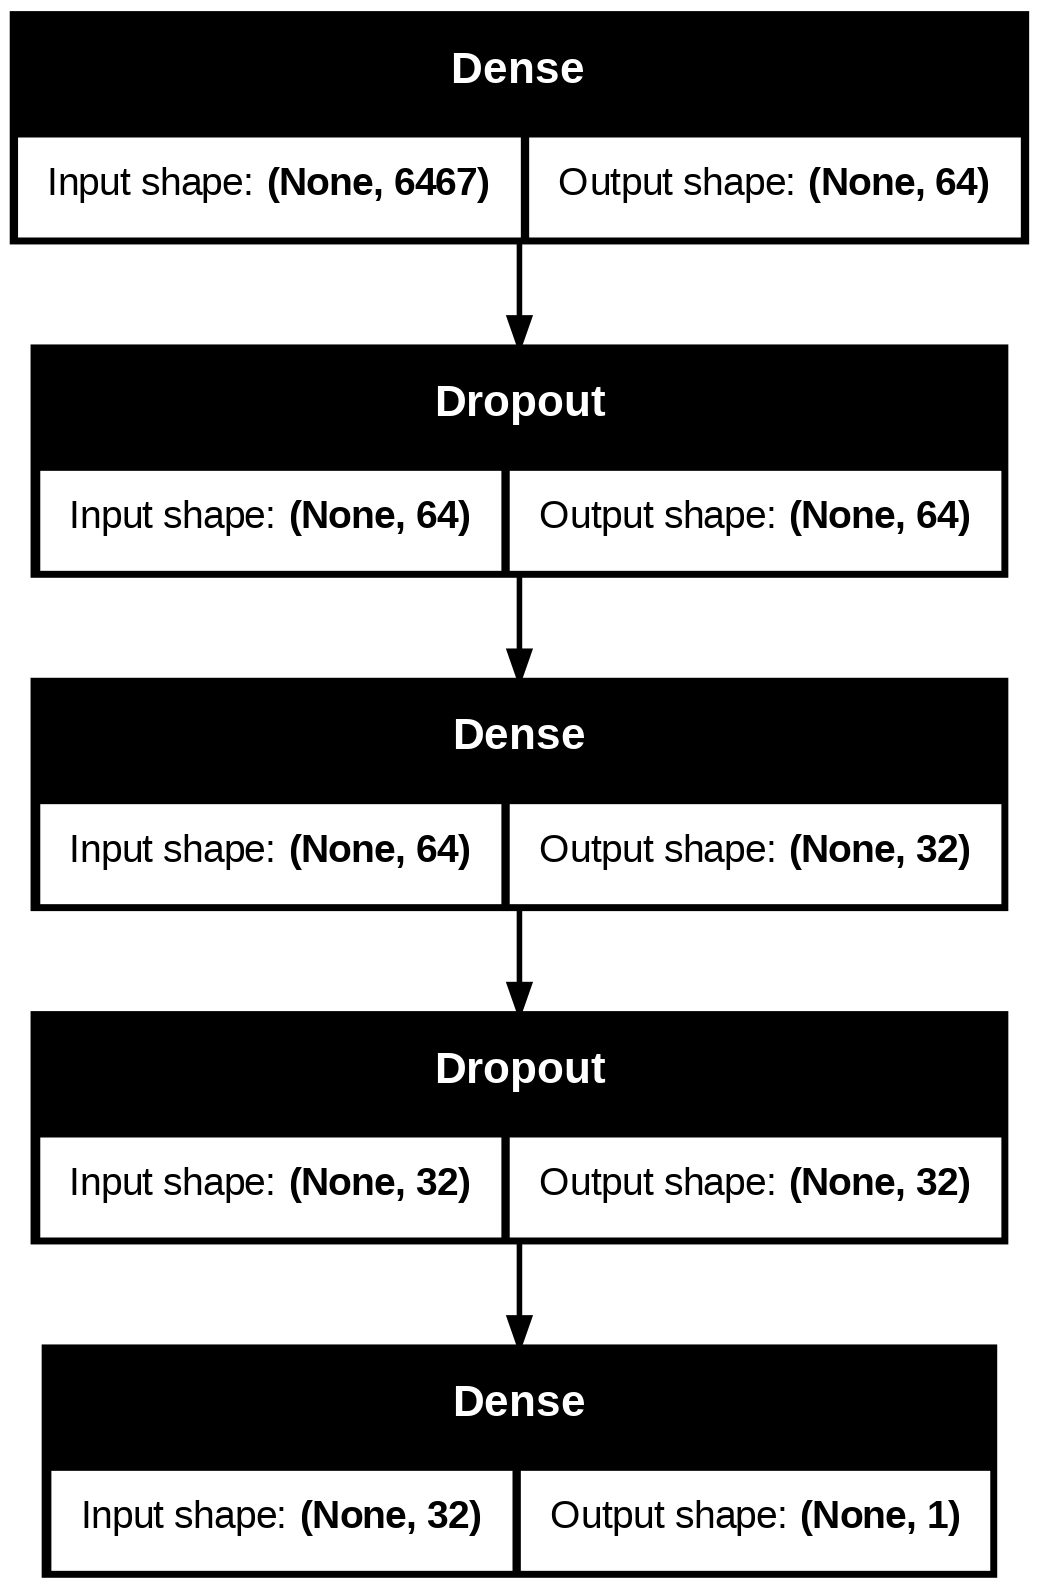

In [236]:
plot_model(model, to_file='model.png',show_shapes=True)

In [274]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])




Se entrena el modelo llamando al método fit() con los datos escalados y se guardan los resultados del entrenamiento en el objeto modelhistory. El modelo se entrena durante 50 épocas con un tamaño de lote de 1024. También se proporcionan los datos de validación para que se evalúe el rendimiento del modelo en cada época.

In [275]:
model.fit(x_train_scaled, y_train_scaled,
          epochs=100,
          batch_size=64,
          validation_data=(x_val_scaled, y_val_scaled),
          verbose=1)

!nvidia-smi

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 7.0530 - mean_absolute_error: 1.4309 - mean_squared_error: 3.7169 - val_loss: 4.1687 - val_mean_absolute_error: 0.5756 - val_mean_squared_error: 0.8614
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7179 - mean_absolute_error: 1.5151 - mean_squared_error: 4.4197 - val_loss: 4.1020 - val_mean_absolute_error: 0.5667 - val_mean_squared_error: 0.8303
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5350 - mean_absolute_error: 1.4887 - mean_squared_error: 4.2717 - val_loss: 4.0493 - val_mean_absolute_error: 0.5657 - val_mean_squared_error: 0.8114
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8560 - mean_absolute_error: 1.3658 - mean_squared_error: 3.6264 - val_loss: 4.0045 - val_mean_absolute_error: 0.5658 - val_mean_squared_error: 0.7993
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0078 - mean_absolute_error: 1.4086 - mean_squared_error: 3.8106 - val_loss: 3.9650 - val_mean_

Ahora realiza la evaluación del modelo con el set de entrenamiento.

In [276]:
result = model.evaluate(x_test_scaled, y_test_scaled)
for i in range(len(model.metrics_names)):
    print("Metric ", model.metrics_names[i], ":", str(round(result[i], 2)))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.6296 - mean_absolute_error: 0.7152 - mean_squared_error: 12.5445
Metric  loss : 11.33
Metric  compile_metrics : 0.65


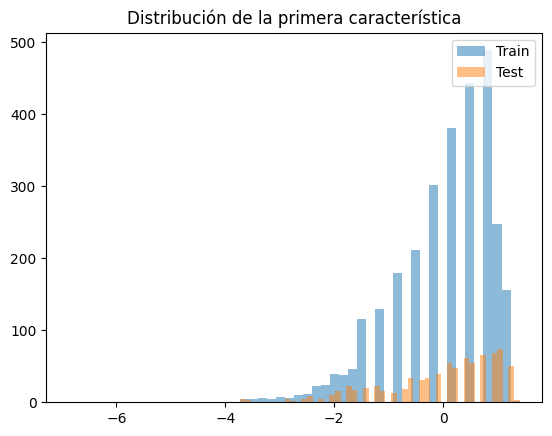

In [183]:
import matplotlib.pyplot as plt

# Comparar la primera característica
plt.hist(x_train_scaled[:, 0], bins=50, alpha=0.5, label='Train')
plt.hist(x_test_scaled[:, 0], bins=50, alpha=0.5, label='Test')
plt.legend(loc='upper right')
plt.title('Distribución de la primera característica')
plt.show()

In [175]:
!pip install keras-tuner -q

import keras_tuner as kt
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# Definir la función para construir el modelo con hiperparámetros
def build_model(hp):
    model = Sequential()

    # Espacio de búsqueda para las unidades en la primera capa
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=256, step=32),
                    activation='relu', input_shape=(x_train_scaled.shape[1],),
                    kernel_regularizer=l2(hp.Choice('l2_reg', values=[0.01, 0.001]))))

    # Dropout en la primera capa
    model.add(Dropout(rate=hp.Choice('dropout_1', values=[0.3, 0.5])))

    # Segunda capa con búsqueda de unidades
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32),
                    activation='relu'))

    # Dropout en la segunda capa
    model.add(Dropout(rate=hp.Choice('dropout_2', values=[0.3, 0.5])))

    # Capa de salida
    model.add(Dense(1, activation='linear'))

    # Optimizador con búsqueda de la tasa de aprendizaje
    optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-6, max_value=1e-3, sampling='log'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

    return model

# Configurar la búsqueda de hiperparámetros con Hyperband (u otras estrategias como RandomSearch)
tuner = kt.Hyperband(build_model,
                     objective='val_mean_squared_error',  # Maximizar o minimizar esta métrica
                     max_epochs=50,
                     factor=3,  # Reducción de recursos para evaluaciones poco prometedoras
                     directory='my_dir',
                     project_name='hyperparam_search')

# Early stopping para evitar sobreajuste
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Realizar la búsqueda
tuner.search(x_train_scaled, y_train_scaled, epochs=100, validation_data=(x_val_scaled, y_val_scaled), callbacks=[early_stopping])

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# Resumen del mejor modelo encontrado
best_model.summary()

# Evaluar el modelo en el conjunto de prueba
result = best_model.evaluate(x_test_scaled, y_test_scaled)
for i in range(len(best_model.metrics_names)):
    print(f"Metric {best_model.metrics_names[i]}: {result[i]}")

Trial 75 Complete [00h 00m 11s]
val_mean_squared_error: 0.5029425024986267

Best val_mean_squared_error So Far: 0.14481070637702942
Total elapsed time: 00h 08m 15s

Search: Running Trial #76

Value             |Best Value So Far |Hyperparameter
64                |64                |units_1
0.001             |0.01              |l2_reg
0.3               |0.3               |dropout_1
128               |96                |units_2
0.5               |0.5               |dropout_2
5.8951e-05        |0.00053287        |learning_rate
17                |50                |tuner/epochs
0                 |17                |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/17
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.1330 - mean_absolute_error: 1.1455 - mean_squared_error: 3.0094 - val_loss: 0.6701 - val_mean_absolute_error: 0.5493 - val_mean_squared_error: 0.5552
Epoch 2/17
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

KeyboardInterrupt: 

Si el modelo cumple con el requerimiento, se guarda con el siguiente comando:

In [ ]:
model.save('predictedprices.h5')

# 5. Realiza un gráfico que evidencia la evolución de la función de pérdidas a traves de las distintas épocas de entrenamiento.

In [ ]:
modelhistory.history

In [ ]:
#Coloca tu código aquí
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(13,6))
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Pérdidas del modelo con set de entrenamiento y pruebas por época")
plt.ylabel('MSE')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

Trata de realizar predicciones con el modelo

In [ ]:
real=pd.DataFrame(y_train)
predic=model.predict(pd.DataFrame(x_train_scaled))
valores_reescalados = scaler1.inverse_transform(predic)
pred_escal =pd.DataFrame(valores_reescalados)
# Muestra los valores reales y las predicciones
for i in range(0,5):
	print("Real=%s, Prediccion=%s" % (real[0][i], pred_escal[0][i]))

___
¡Todo bien! ¡Es todo por hoy! 😀